# Fisrt Neural Network In Keras

## Fisrt MLP

### PimaIndians Dataset


Predict the Onset of Diabetes

Data mining and machine learning is helping medical professionals make diagnosis easier by bridging the gap between huge data sets and human knowledge. We can begin to apply machine learning techniques for classification in a dataset that describes a population that is under a high risk of the onset of diabetes.

Diabetes Mellitus affects 382 million people in the world, and the number of people with type-2 diabetes is increasing in every country. Untreated, diabetes can cause many complications.

Diabetes
Diabetes Test
Photo by Victor, some rights reserved.
The population for this study was the Pima Indian population near Phoenix, Arizona. The population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes.

For the purposes of this dataset, diabetes was diagnosed according to World Health Organization Criteria, which stated that if the 2 hour post-load glucose was at least 200 mg/dl at any survey exam or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

Given the medical data we can gather about people, we should be able to make better predictions on how likely a person is to suffer the onset of diabetes, and therefore act appropriately to help. We can start analyzing data and experimenting with algorithms that will help us study the onset of diabetes in Pima Indians.

Related Work

Our study begins with an in-depth look of how researchers that used the same dataset approached the same problem. This helped me gain an understanding of the data and pave the way for my study, especially since the authors suggested alternative methods that are worth researching.

In 1988, Smith, Everhart, Dickson, Knowler, and Johannes performed an evaluation of using an early neural network model, ADAP, to forecast the onset of diabetes mellitus in a high-risk population of Pima Indians. They argued that the neural network approach would provide strong results when “the sample size is small, the form of underlying functional relationship is not known, and the underlying functional relationships involve complex interactions and intercorrelations among a number of variables“, see Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus.

They describe ADAP as “an adaptive learning routine that generates and executes digital analogs of perceptron-like devices“, see Learning in Control and Pattern Recognition Systems. The algorithm will make predictions based on a function of input variables, and will make internal adjustments if predictions are incorrect. The network is split into 3 main layers:

Input, partitioned into “sensors”: Represents a discrete value. These are organized into partitions and are “excited” by input.
Association Units: Uses a threshold function to activate a specific responder value. Connected to adjustable weights that change based on said function.
Responder: Responder values are summed and constitute a specific prediction.
The network defined a “fixed matrix” that contained a partition for each attribute, a range of possible values, and the ability to identify connections in the data through a “variable array.” Rows in the matrix correspond to sensors, while columns correspond to association units. The variable array provided a way to easily identify connections between sensors and association units.

768 Females of Pima Indian Heritage

We can learn from the data found on UCI Machine Learning Repository which contains data on female patients at least 21 years old of Pima Indian heritage.

We have 768 instances and the following 8 attributes:

1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).

9. Class, onset of diabetes within five years.  (Output)



A particularly interesting attribute used in the study was the Diabetes Pedigree Function, pedi. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus. 


In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy


Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221.0
Trainable params: 221
Non-trainable params: 0.0
_________________________________________________________________


In [4]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
768/768 [==============================] - 0s - loss: 3.7327 - acc: 0.6016     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.9372 - acc: 0.5911     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.7479 - acc: 0.6458     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.7116 - acc: 0.6589     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6810 - acc: 0.6732     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6507 - acc: 0.6810     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6493 - acc: 0.6693     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6368 - acc: 0.6901     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6241 - acc: 0.6901     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6299 - acc: 0.6797     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6479 - acc

# Evaluate The Performance Of Deep Learning Models

## Automatic Split

In [5]:
# MLP with automatic validation set
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 2/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 3/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 4/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 5/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 6/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 7/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 8/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401

514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 132/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 133/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 134/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 135/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 136/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 137/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 138/150
514/514 [==============================] - 0s - loss: 5.8013 - acc: 0.6401 - val_loss: 5.2669 - val_acc: 0.6732
Epoch 

## Manual Split

In [6]:
# MLP with manual validation set
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 2/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 3/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 4/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 5/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 6/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 7/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 8/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576

514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 131/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 132/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 133/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 134/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 135/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 136/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 137/150
514/514 [==============================] - 0s - loss: 5.5190 - acc: 0.6576 - val_loss: 5.8381 - val_acc: 0.6378
Epoch 

## Manual CrossValidation

In [7]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]


In [11]:
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    #model.summary()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 221.0
Trainable params: 221
Non-trainable params: 0.0
_________________________________________________________________
acc: 80.52%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
______________________________________________________________

KeyboardInterrupt: 

# Use Keras with Scikit Learn

## Grid Search

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import numpy


In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init, activation='relu'))
    model.add(Dense(8, kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal']
epochs = [50, 100]
batches = [5, 10]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Save models with Serialization

## Serialize the Model to json file

In [13]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.summary()
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 221.0
Trainable params: 221
Non-trainable params: 0.0
_________________________________________________________________
acc: 76.43%


In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Saved model to disk
Loaded model from disk
acc: 76.43%


# Keep The Best Models During Training Using Model Check Pointing

## Check Point Best Model

In [15]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00000: val_acc improved from -inf to 0.67323, saving model to weights.best.hdf5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc improved from 0.67323 to 0.67717, saving model to weights.best.hdf5
Epoch 00005: val_acc improved from 0.67717 to 0.69291, saving model to weights.best.hdf5
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc improved from 0.69291 to 0.70866, saving model to weights.best.hdf5
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc improved from 0.70866 to 0.70866, saving model to weights.best.hdf5
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc improved from 0.70866 to 0.71260, saving model to weights.best.hdf5
Epoch 00018: val_acc did 

## Check Point Model Improvements

In [16]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00000: val_acc improved from -inf to 0.67323, saving model to weights-improvement-00-0.67.hdf5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc improved from 0.67323 to 0.69685, saving model to weights-improvement-03-0.70.hdf5
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc improved from 0.69685 to 0.70079, saving model to weights-improvement-18-0.70.hdf5
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_acc did 

# Understand Model Behaviour During Training

## Plot Model History

dict_keys(['val_acc', 'val_loss', 'loss', 'acc'])


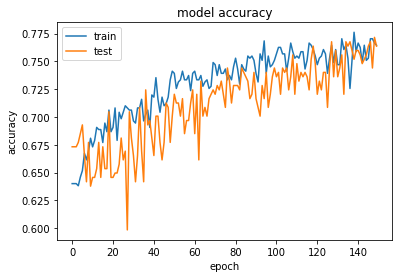

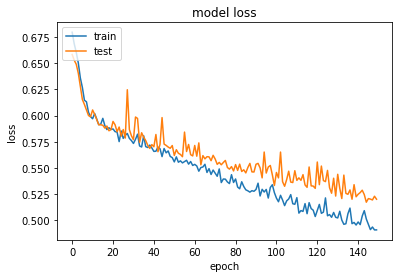

In [17]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
